<a href="https://colab.research.google.com/github/katerinbarrera21/Simulacion/blob/main/tareas2/pruebaSimulacionSimpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

Cajeros automaticos
El cliente AUTO-1 llega a las 0
El cliente AUTO-2 llega a las 0
El cliente AUTO-3 llega a las 0
El cliente AUTO-4 llega a las 0
El cliente AUTO-5 llega a las 0
El caril entra en uso por el auto AUTO-1 a las 0
El auto AUTO-1 entra a estacionarse a las 0
El caril entra en uso por el auto AUTO-2 a las 0
El auto AUTO-2 entra a estacionarse a las 0
El caril entra en uso por el auto AUTO-3 a las 0
El auto AUTO-3 entra a estacionarse a las 0
El cliente AUTO-6 llega a las 3
El auto AUTO-3 termina de a estacionarse a las 3
El  auto AUTO-3 entra a sacar su turno a las 3
El auto AUTO-1 termina de a estacionarse a las 4
El  auto AUTO-1 entra a sacar su turno a las 4
El auto AUTO-2 termina de a estacionarse a las 4
El  auto AUTO-2 entra a sacar su turno a las 4
El  auto AUTO-3 termina de a sacar su turno a las 4
El  auto AUTO-3 entra a pagar matricula 4
El  auto AUTO-1 termina de a sacar su turno a las 5
El  auto AUTO-1 entra a pagar matricula 5
El  auto AUTO-2 termina de a saca

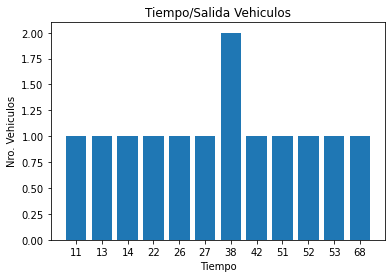

In [ ]:
import simpy
import random
from scipy.stats import uniform
from random import expovariate
from scipy import stats
NUM_CAJEROS = 3
NUM_CARRILES =3
RANGO_llegada = 3
#Llega el vehiculo al centro, se estaciona (3-5 minutos), saca un turno (1-3 minutos) y pagan la matricula (5 - 10 minutos).
tiempo={}
TIEMPO_SIMULACION=21
# Creamos una clase que permita modelar mi escenario


class CARRIL_ASIGNADO(object):
  def __init__(self, environment, num_carriles):
    # Guardamos como variable el entorno de ejecucion
    self.env=environment
    # Creamos el recurso que representa los cajeros
    self.carril = simpy.Resource(environment, num_carriles)
  #  while cont ==0:
   #   print(f'El auto {cliente} entra a revision a las {env.now}')
    #  yield self.env.timeout(random.normalvariate(20, 10))
     # print(f'El auto {cliente} sale de revision  a las {env.now}')
     # yield self.env.timeout(random.randint(1,3))
     # print(f'El auto {cliente} ya tiene su sello  a las {env.now}')
     # yield self.env.timeout(random.randint(5,10))
     # print(f'El auto {cliente} sale y finaliza  su proceso  a las {env.now}')
     

  def usar_carril(self, cliente):
    print(f'El caril entra en uso por el auto {cliente} a las {env.now}')
    print(f'El auto {cliente} entra a estacionarse a las {env.now}')
    yield self.env.timeout(random.randint(3,5))
    print(f'El auto {cliente} termina de a estacionarse a las {env.now}')
    print(f'El  auto {cliente} entra a sacar su turno a las {env.now}')
    yield self.env.timeout(random.randint(1,3))
    print(f'El  auto {cliente} termina de a sacar su turno a las {env.now}')
    print(f'El  auto {cliente} entra a pagar matricula {env.now}')
    yield self.env.timeout(random.randint(5,10))
    print(f'El  auto {cliente} termina de pagar la matricula {env.now}')

   


def recurso_usuario(env, recurso, nombre):
  print('Intento solicitar recurso')
  cont=0
  with recurso.request() as peticion: # Genero un evento de requerimiento
    yield peticion # Obtengo el recurso
    print ("--------------revision-----------")
    print(f'El auto {nombre} entra a revision a las {env.now}')
    yield env.timeout(random.normalvariate(20, 10))
    print(f'El auto {nombre} proceso de revision  a las {env.now}')
    yield env.timeout(random.randint(1,3))
    print(f'El auto {nombre} ya tiene su sello  a las {env.now}')
    yield env.timeout(random.randint(5,10))
    print(f'El auto {nombre} sale y finaliza  su proceso  a las {env.now}')
    print(f' EL AUTO {nombre} termina de usar recurso en el tiempo {env.now}')
    print (f'EL AUTO {nombre} termina su revision y libera el recurso')
    recurso.release(peticion) #Libero el recurso despues de su uso.
# Obtiene las caracteristicas del recurso






# Generamos el proceso de cola
def llegada_cliente(env, nombre, carrilAsignado):
  print(f'El cliente {nombre} llega a las {env.now}')
  # Especificamos que vamos a usar un recurso (Resource) que representa
  with carrilAsignado.carril.request() as carril:
    # Ocupamos la maquina de lavado
    yield carril
    yield env.process(carrilAsignado.usar_carril(nombre))
    res = simpy.Resource(env, capacity=1)
    #usuario = env.process(recurso_usuario(env, res)) #
    
    proceso = env.process(recurso_usuario(env, res, nombre)) # Dos invocaciones del uso del recurso

    k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
  if k in tiempo:
      tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
  else:
      tiempo[k]=1 # Por defecto empezamos con el primer vehiculo




def ejecutar_simulacion(env, num_carriles):
  carrilAsignado=CARRIL_ASIGNADO(env, num_carriles)
  # Creamos 5 llegadas de clientes iniciales
  for i in range(5):
    env.process(llegada_cliente(env, 'AUTO-%d'%(i+1),carrilAsignado))
    
  # Ejecutamos la simulacion
  while True:
    # Generamos un procesos de llegada uniforme
   
    yield env.timeout(3)
    i+=1
    # Atiendo a los clientes
    env.process(llegada_cliente(env,'AUTO-%d'%(i+1),carrilAsignado))

     # Terminamos despues de 1000 clientes
    if i == 12:
      break

      
print('Cajeros automaticos')
# Inicializamos la semilla aleatoria
random.seed(77)
# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_CARRILES))

# Ejecutamos el proceso
env.run()

# Ejecutamos el proceso durante el tiempo de simulacion


print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()

La empresa desea saber si tiene los recursos necesarios para soportar la demanda de los usuarios e
incrementar el numero de ticktes por día. En base a ello, diseñe y desarrolle un modelo y/o script que
permita realizar la simulación del proceso de pasar cuenca-aire con las siguientes especificaciones

* La empresa tiene 3 carriles de revisión vehicular
* Un solo carril es habilitado para carros de gran tonelaje, busetas, bus, camiones, solo el 15 %
de vehiculos que llegan son de este tipo.
* Cada 3 minutos llega un nuevo vehiculo a revision.
* Se sigue el siguiente proceso

1. Llega el vehiculo al centro, se estaciona (3-5 minutos), saca un turno (1-3 minutos) y pagan
la matricula (5 - 10 minutos).
2. Si esta vacio pasa directo a la revisión que tiene una media de 20 minutos con una
desviacion estandar de 10 minutos.
3. Solo el 60 % de vehiculos pasa sin ninguna notificación, el 40% salen realizan el arreglo (2
dias) y nuevamente realizan el proceso.
4. Despues de pasar la revisión, se les pega el sello (1 – 3 minutos) .
5. Finalmente, salen (5 – 10 minutos).
Generar un modelo de simulación por 30 dias y generar las siguientes graficas de resultados:
* Numero de vehiculos atendidos por dia, y por carril
* Porcentaje total de vehiculos aprobados y no aprobados en cuenca aire por dia.
* Tiempos del proceso de matriculación, por dia

In [ ]:
import simpy
import random
from scipy.stats import uniform
from random import expovariate
from scipy import stats
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

NUM_CAJEROS = 3
NUM_CARRILES =3
RANGO_llegada = 3
#Llega el vehiculo al centro, se estaciona (3-5 minutos), saca un turno (1-3 minutos) y pagan la matricula (5 - 10 minutos).
tiempo={}
TIEMPO_SIMULACION=21
# Creamos una clase que permita modelar mi escenario
#--------------------------------------------------
#1. La empresa tiene 3 carriles de revisión vehicular
#Un solo carril es habilitado para carros de gran tonelaje, busetas, bus, camiones, solo el 15 %
#de vehiculos que llegan son de este tipo
CARRIL_GRAN_TONELAJE=1
CARRIL_AUTO_NORMAL=2
ConteoTipoAuto = {}
vehiculos_dia = {}
terminados_dia = {}
vehiculos_rechasados = {}
rechazados_dia = {}
minutos_dia= {}

class CARRIL_ASIGNADO(object):

  def __init__(self, environment,  num_carriles):
    # Guardamos como variable el entorno de ejecucion
    self.env=environment
    # Creamos el recurso que representa los carriles
    self.carril = simpy.Resource(environment, num_carriles)

  def revision(self, tiempo_revision):
        yield self.env.timeout(tiempo_revision)


  def usar_carril(self, cliente, tipo):
    print(f'El caril entra en uso por el auto CON TIPO {tipo} a las {env.now}')
    print(f'El auto CON TIPO {tipo}  entra a estacionarse a las {env.now}')
    yield self.env.timeout(random.randint(3,5))
    print(f'El auto  CON TIPO {tipo} termina de a estacionarse a las {env.now}')
    print(f'El  auto  CON TIPO {tipo}  entra a sacar su turno a las {env.now}')
    yield self.env.timeout(random.randint(1,3))
    print(f'El  auto  CON TIPO {tipo}  termina de a sacar su turno a las {env.now}')
    print(f'El  auto  CON TIPO {tipo} entra a pagar matricula {env.now}')
    yield self.env.timeout(random.randint(5,10))
    print(f'El  auto  CON TIPO {tipo} termina de pagar la matricula {env.now}')

def recurso_usuario(env, recurso, nombre, tipo):
  print('Intento solicitar recurso')
  cont=0
  with recurso.request() as peticion: # Genero un evento de requerimiento
    yield peticion # Obtengo el recurso
    print ("--------------revision-----------")
    print(f'El auto  CON TIPO {tipo} entra a revision a las {env.now}')
    yield env.timeout(random.normalvariate(20, 10))
    print(f'El auto CON TIPO {tipo} proceso de revision  a las {env.now}')
    yield env.timeout(random.randint(1,3))
    print(f'El auto CON TIPO {tipo} ya tiene su sello  a las {env.now}')
    yield env.timeout(random.randint(5,10))
    print(f'El auto CON TIPO {tipo} sale y finaliza  su proceso  a las {env.now}')
    print(f' EL AUTO  CON TIPO {tipo} termina de usar recurso en el tiempo {env.now}')
    print (f'EL AUTO CON TIPO {tipo} termina su revision y libera el recurso')
    recurso.release(peticion) #Libero el recurso despues de su uso.


  
# Obtiene las caracteristicas del recurso



def tiempo_revision():
    return int(np.random.normal(20,10,1)[0])

def pasan_revision():
    return np.random.choice([1,2], p=[0.6,0.4])
# Generamos el proceso de cola
def seleccion_vehiculo():
    return np.random.choice([1,2], p=[0.15,0.85])#1=pesado   y 2=normal


def llegada_cliente(env, nombre, carrilAsignado, tipoAuto):
 
  if(tipoAuto in ConteoTipoAuto):
    ConteoTipoAuto[tipoAuto] += 1
  else:
    ConteoTipoAuto[tipoAuto] = 1


  print(f'El cliente  CON TIPO {tipoAuto} llega a las {env.now}')
  # Especificamos que vamos a usar un recurso (Resource) que representa
  with carrilAsignado.carril.request() as carril:
    # Ocupamos la maquina de lavado
    yield carril
    tiempo_inicio_proceso = env.now

        #tiempo de llegada
    yield env.timeout(random.randint(3,5))
    #tiempo cuando saca el turno
    yield env.timeout(random.randint(1,3))
    #tiempo cuando paga la matricula
    yield env.timeout(random.randint(5,10))

    #hacer un if para ver si consiguio o no terminar el proceso para darles sello
    t = tiempo_revision()
    while t < 0:
        t = tiempo_revision()
    yield env.process(CARRIL_ASIGNADO.revision(t))

    #para saber si pasa o no la revision
    res = pasan_revision()
    if(res==1):# si paso la revision
        yield env.timeout(random.randint(1,2)) # sello
        if(tipoAuto in ConteoTipoAuto):
            ConteoTipoAuto[tipoAuto] += 1
        else:
            ConteoTipoAuto[tipoAuto] = 1
        
        #cantidad de revisiones por dia
        tiempo_dia = env.now
        dia = math.trunc(tiempo_dia/1440)
        if(dia in vehiculos_dia):
            vehiculos_dia[dia] += 1
        else:
            vehiculos_dia[dia] = 1
            
        if(dia in terminados_dia):
            terminados_dia[dia] += 1
        else:
            terminados_dia[dia] = 1

    else:
        tiempo_volver = env.now + 2880
        vehiculos_rechasados[tiempo_volver] = tipoAuto

        tiempo_dia = env.now
        dia = math.trunc(tiempo_dia/1440)
        if(dia in rechazados_dia):
            rechazados_dia[dia] += 1
        else:
            rechazados_dia[dia] = 1
    #si cuando un vehiculo es rechazado y no cuenta el tiempo de salida, meter esto dentro de un if
    #tiempo de salida
    yield env.timeout(random.randint(5,10))

    tiempo_fin_proceso = env.now

    tiempo_dia = env.now
    dia = math.trunc(tiempo_dia/1440)
    if(dia in minutos_dia):
        minutos_dia[dia] += tiempo_fin_proceso - tiempo_inicio_proceso
    else:
        minutos_dia[dia] = tiempo_fin_proceso - tiempo_inicio_proceso
    #tiempo_inicio_proceso = env.now
    #yield env.process(carrilAsignado.usar_carril(nombre,tipoAuto))
    #res = simpy.Resource(env, capacity=1)
    #usuario = env.process(recurso_usuario(env, res)) #
    #proceso = env.process(recurso_usuario(env, res, nombre, tipoAuto)) # Dos invocaciones del uso del recurso
    #k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
  #if k in tiempo:
  #    tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
  #else:
   #   tiempo[k]=1 # Por defecto empezamos con el primer vehiculo




def ejecutar_simulacion(env,carril_auto_normal, carril_gran_tonelaje, num_carriles):
  carrilAsignado=CARRIL_ASIGNADO(env, num_carriles)
  carrilAsignadoAutoNormal= CARRIL_ASIGNADO(env, carril_auto_normal)
  carrilAsignadoAutoPesado= CARRIL_ASIGNADO(env, carril_gran_tonelaje)


  # Ejecutamos la simulacion
  tiempo= env.now 
  while True:
    iteradorTiempo= env.now

    k = env.now
    if k in vehiculos_rechasados:
            if vehiculos_rechasados[k]==1:
                env.process(llegada_cliente(env,carrilAsignadoAutoPesado,vehiculos_rechasados[k]))
            else:
                env.process(llegada_cliente(env,carrilAsignadoAutoNormal,vehiculos_rechasados[k]))
    if(tie_llegada==k):
            tipo = seleccion_vehiculo()
            if(tipo==1):
                env.process(llegada_cliente(env,carrilAsignadoAutoPesado,tipoAuto))
            else:
                env.process(llegada_cliente(env,carrilAsignadoAutoNormal,tipoAuto))
            tie_llegada=k+3

    if(tiempo==iteradorTiempo):
      
      tipoAuto = np.random.choice([1,2], p=[0.85,0.15])
      print (f'este es el tipo de auto {tipoAuto}')
      if(tipoAuto==1):
        env.process(llegada_cliente(env,'AUTO-%d'%(i+1),carrilAsignadoAutoNormal, tipoAuto))
      if(tipoAuto==2):
        env.process(llegada_cliente(env,'AUTO-%d'%(i+1),carrilAsignadoAutoPesado, tipoAuto))
    yield env.timeout(3)
    i+=1
    # Atiendo a los clientes
    #env.process(llegada_cliente(env,'AUTO-%d'%(i+1),carrilAsignado))
     # Terminamos despues de 1000 clientes
    if i == 12:
      break

      
print('Cajeros automaticos')
# Inicializamos la semilla aleatoria
random.seed(77)
# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, CARRIL_AUTO_NORMAL, CARRIL_AUTO_NORMAL, NUM_CARRILES))

# Ejecutamos el proceso
env.run()

# Ejecutamos el proceso durante el tiempo de simulacion
print('TOTAL AUTOS NORMALES: %s' % ConteoTipoAuto[1])
print('TOTAL AUTOS PESADOS: %s' % ConteoTipoAuto[2])
print('TOTAL: %s' % (ConteoTipoAuto[1]+ConteoTipoAuto[2]))

print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()

Cajeros automaticos
este es el tipo de auto 1
este es el tipo de auto 1
este es el tipo de auto 1
este es el tipo de auto 1
este es el tipo de auto 1
El cliente  CON TIPO 1 llega a las 0
El cliente  CON TIPO 1 llega a las 0
El cliente  CON TIPO 1 llega a las 0
El cliente  CON TIPO 1 llega a las 0
El cliente  CON TIPO 1 llega a las 0


TypeError: ignored

In [ ]:
import simpy
import random
from scipy.stats import uniform
from random import expovariate
from scipy import stats
from numpy import random as nprandom
NUM_CARRILES =3
carril_liviano1 = {}
carril_liviano2 = {}
carril_pesado = {}
autos_aprovados= {}
autos_rechazados= {}
tiempoTotalAutos_porDis= {}
tiempo_total_dia={}
tipo_liviano_carril= [2,1]
num_livianos_total=2
num_pesados_total=1
RANGO_llegada = 3
#Llega el vehiculo al centro, se estaciona (3-5 minutos), saca un turno (1-3 minutos) y pagan la matricula (5 - 10 minutos).
tiempo={}
TIEMPO_SIMULACION=43200 #30 dias
# Creamos una clase que permita modelar mi escenario



class CARRIL_ASIGNADO(object):
  def __init__(self, environment, num_livianos, num_pesados):
    # Guardamos como variable el entorno de ejecucion
    self.env=environment
    # Creamos el recurso que representa los cajeros
    self.carril_liviano = simpy.Resource(environment, num_livianos)
    self.carril_pesado = simpy.Resource(environment, num_pesados)

  #  while cont ==0:
   #   print(f'El auto {cliente} entra a revision a las {env.now}')
    #  yield self.env.timeout(random.normalvariate(20, 10))
     # print(f'El auto {cliente} sale de revision  a las {env.now}')
     # yield self.env.timeout(random.randint(1,3))
     # print(f'El auto {cliente} ya tiene su sello  a las {env.now}')
     # yield self.env.timeout(random.randint(5,10))
     # print(f'El auto {cliente} sale y finaliza  su proceso  a las {env.now}')
     

  def usar_carril(self, cliente, tipo):


    print(f'El caril entra en uso por el auto {cliente} a las {env.now}')
    tiempo_procesos= random.randint(3,5)
    yield self.env.timeout(tiempo_procesos)
    tiempo_total_dia= +tiempo_procesos
    print(f'El auto {cliente} se estaciona a las {env.now}, [{tiempo_procesos}]')

    tiempo_procesos= random.randint(1,3)
    yield self.env.timeout(tiempo_procesos)
    tiempo_total_dia= +tiempo_procesos   
    print(f'El  auto {cliente}  saca su turno a las {env.now}, [{tiempo_procesos}]')

    tiempo_procesos = random.random.randint(5,10)
    yield self.env.timeout(tiempo_procesos)
    tiempo_total_dia= +tiempo_procesos       
    print(f'El  auto {cliente}  paga la matricula {env.now},  [{tiempo_procesos}] ')

    idMaquinaActual= 0

    if tipo == 'normal' : 

        with CARRIL_ASIGNADO.carril_liviano.request() as carril_liviano:
            
            yield carril_liviano
            print(f'AUTO {cliente}, tiempo {env.now}, tipo {tipo}')
            mu, sigma = 20, 10 
            tiempo = abs(math.ceil(np.random.normal(mu, sigma, 1))) 
            yield self.env.timeout(tiempo)
            print(f'El AUTo {cliente} en el tiempo {tiempo}')
            tiempo_total_dia =+ tiempo
            
                    
    elif tipo == 'pesado': 
        
        with CARRIL_ASIGNADO.carril_pesado.request() as carril_pesado:
            
            yield carril_pesado
            print(f'AUTO {cliente}, tiempo {env.now}, tipo {tipo}')
            mu, sigma = 20, 10 
            tiempo = abs(math.ceil(np.random.normal(mu, sigma, 1))) 
            yield self.env.timeout(tiempo)
            print(f'El AUTo {cliente} en el tiempo {tiempo}')
            tiempo_total_dia =+ tiempo
   


def recurso_usuario(env, recurso, nombre):
  print('Intento solicitar recurso')
  #cont=0
  #with recurso.request() as peticion: # Genero un evento de requerimiento
    #yield peticion # Obtengo el recurso
    #print ("--------------revision-----------")
    #print(f'El auto {nombre} entra a revision a las {env.now}')
    #yield env.timeout(random.normalvariate(20, 10))
    #print(f'El auto {nombre} proceso de revision  a las {env.now}')
    #yield env.timeout(random.randint(1,3))
    #print(f'El auto {nombre} ya tiene su sello  a las {env.now}')
    #yield env.timeout(random.randint(5,10))
    #print(f'El auto {nombre} sale y finaliza  su proceso  a las {env.now}')
    #print(f' EL AUTO {nombre} termina de usar recurso en el tiempo {env.now}')
    #print (f'EL AUTO {nombre} termina su revision y libera el recurso')
    #recurso.release(peticion) #Libero el recurso despues de su uso.
# Obtiene las caracteristicas del recurso




def tipoVehiculo():
  return nprandom.binomial(n=1, p=0.15, size=1)

def pasarRevision():
  return nprandom.binomial(n=1, p=0.6, size=1)

# Generamos el proceso de cola
def llegada_cliente(env,tipo, nombre, carrilAsignado):
  print(f'El auto {nombre} llega a las {env.now}')
  yield env.process(carrilAsignado.usar_carril(nombre, tipo))
    #res = simpy.Resource(env, capacity=1)
    #usuario = env.process(recurso_usuario(env, res)) #
    
    #proceso = env.process(recurso_usuario(env, res, nombre)) # Dos invocaciones del uso del recurso

  #  k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
  #if k in tiempo:
   #   tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
  #else:
 #     tiempo[k]=1 # Por defecto empezamos con el primer vehiculo




def ejecutar_simulacion(env, num_livianos_total, num_pesados_total):
  carrilAsignado=CARRIL_ASIGNADO(env, num_livianos_total, num_pesados_total)
  # Creamos 5 llegadas de clientes iniciales
  #for i in range(5):
   # env.process(llegada_cliente(env,tipo ,'AUTO-%d'%(i+1),carrilAsignado))
  
  i= 0
  # Ejecutamos la simulacion
  while True:
    # Generamos un procesos de llegada uniforme
   
    yield env.timeout(3)
    i+=1
    # Atiendo a los clientes
    tipo= tipoVehiculo()
    if tipo ==0 :
      tipoVehi= 'normal'
    elif tipo==1:
      tipoVehi= 'pesado'
    env.process(llegada_cliente(env, tipoVehi, 'AUTO-%d'%(i),carrilAsignado))

     # Terminamos despues de 1000 clientes
    if i == 12:
      break

      
print('Cajeros automaticos')
# Inicializamos la semilla aleatoria
random.seed(77)
# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, num_livianos_total, num_pesados_total))

# Ejecutamos el proceso
env.run()

# Ejecutamos el proceso durante el tiempo de simulacion


print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()

Cajeros automaticos
El auto AUTO-1 llega a las 3
El caril entra en uso por el auto AUTO-1 a las 3
El auto AUTO-2 llega a las 6
El caril entra en uso por el auto AUTO-2 a las 6
El auto AUTO-1 se estaciona a las 7, [4]
El  auto AUTO-1  saca su turno a las 8, [1]


AttributeError: ignored